In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
from sklearn.pipeline import Pipeline


In [2]:
import os

# Set environment variable to use GPU
# To limit TensorFlow to use only the first GPU (0th GPU), you can set this:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Use GPU 0 (first GPU)

In [3]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [10]:
## Save the encoders 
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [11]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [12]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### ANN Implementation

In [13]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.6.0


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime
from sklearn.pipeline import Pipeline





In [15]:
import tensorflow as tf
print(tf.__version__)


2.6.0


In [16]:
(X_train.shape[1],)


(12,)

In [ ]:
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

# Ensure that you have X_train, y_train, X_test, and y_test loaded

# Create the model function
def create_model(neurons=32, layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
    
    return model

# Create parameter grid manually
param_grid = {
    'neurons': [16, 32, 64, 128],
    'layers': [1, 2, 3],
    'epochs': [100]
}

# Set up initial best parameters and model tracker
best_score = 0
best_params = None
best_model = None

# Set up TensorBoard callback and EarlyStopping callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Manually loop over parameters for grid search
for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    
    model = create_model(neurons=params['neurons'], layers=params['layers'])
    
    # Train the model with the current set of parameters
    history = model.fit(
        X_train, y_train, validation_data=(X_test, y_test), epochs=params['epochs'],
        callbacks=[tensorflow_callback, early_stopping_callback], verbose=1
    )
    
    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"Score: {score}")
    
    # Update best model if necessary
    if score[1] > best_score:  # score[1] is accuracy
        best_score = score[1]
        best_params = params
        best_model = model

# Print the best parameters and score
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

# Save the best model
best_model.save('best_model.h5')

# Plotting the training and validation metrics
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# TensorBoard visualization
%load_ext tensorboard
%tensorboard --logdir logs/fit


Training with params: {'epochs': 100, 'layers': 1, 'neurons': 16}
Epoch 1/100
250/250 [==============================] - 4s 8ms/step - loss: 0.5935 - accuracy: 0.6930 - val_loss: 0.4632 - val_accuracy: 0.8150
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4499 - accuracy: 0.8125 - val_loss: 0.4256 - val_accuracy: 0.8190
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4298 - accuracy: 0.8169 - val_loss: 0.4117 - val_accuracy: 0.8240
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4166 - accuracy: 0.8232 - val_loss: 0.4003 - val_accuracy: 0.8325
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4049 - accuracy: 0.8292 - val_loss: 0.3907 - val_accuracy: 0.8355
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3946 - accuracy: 0.8346 - val_loss: 0.3824 - val_accuracy: 0.8435
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0

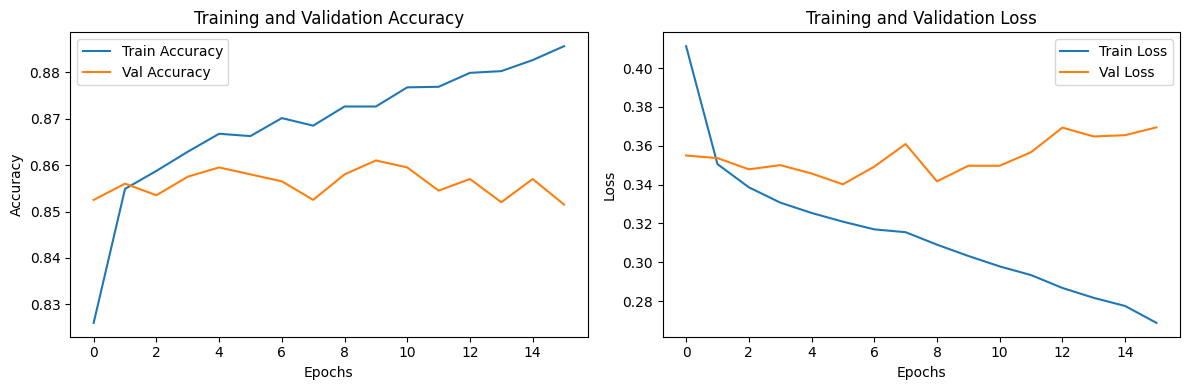

In [17]:
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

# Create the model function
def create_model(neurons=32, layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
    
    return model

# Create parameter grid manually
param_grid = {
    'neurons': [16, 32, 64, 128],
    'layers': [1, 2, 3],
    'epochs': [100]
}

# Manually loop over parameters
best_score = 0
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    
    model = create_model(neurons=params['neurons'], layers=params['layers'])
    
    # Set up the TensorBoard and EarlyStopping callbacks
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        X_train, y_train, validation_data=(X_test, y_test), epochs=params['epochs'],
        callbacks=[tensorflow_callback, early_stopping_callback], verbose=1
    )
    
    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"Score: {score}")
    
    # Save best model
    if score[1] > best_score:  # score[1] is accuracy
        best_score = score[1]
        best_params = params
        best_model = model

# Print the best parameters and score
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

# Save the best model
best_model.save('best_model.h5')

# Optionally, you can plot or analyze the training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [21]:
best_model

In [22]:
best_score
best_params


{'epochs': 100, 'layers': 1, 'neurons': 32}

In [23]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [24]:
## Load Tensorboard Extension
%load_ext tensorboard

In [26]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17940), started 2 days, 1:38:11 ago. (Use '!kill 17940' to kill it.)